In [ ]:
pip install keras


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import keras

In [ ]:
d1 = pd.read_csv('Churn_Modelling.csv')

In [ ]:
d1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
d1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df1 = d1.iloc[:,3:13]
df2 = d1.iloc[:,13]

In [ ]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
df2

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
geography=pd.get_dummies(df1["Geography"],drop_first=True)
gender=pd.get_dummies(df1['Gender'],drop_first=True)


In [ ]:
df1 = pd.concat([df1,geography,gender],axis=1)

In [ ]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [ ]:
df1 = df1.drop(['Geography','Gender'],axis = 1)

In [ ]:
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1,df2, test_size=0.2, random_state=0)

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [ ]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,True,False,False
898,523,40,2,102967.41,1,1,0,128702.10,False,False,False
2398,706,42,8,95386.82,1,1,1,75732.25,False,True,False
5906,788,32,4,112079.58,1,0,0,89368.59,False,False,True
2343,706,38,5,163034.82,2,1,1,135662.17,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,False,False,False
2899,586,35,7,0.00,2,1,0,70760.69,False,False,False
9549,578,36,1,157267.95,2,1,0,141533.19,False,True,True
2740,650,34,4,142393.11,1,1,1,11276.48,True,False,True


In [35]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [44]:
classifier1 = Sequential()

In [45]:
#input and first hidden layer
classifier1.add(Dense(units = 6, kernel_initializer = "he_uniform",activation = 'relu', input_dim = 11))
#classifier.add(Dropout(0.4)
#second hidden layer
classifier1.add(Dense(units = 6, kernel_initializer = "he_uniform",activation = 'relu'))
#classifier.add(Dropout(0.4)
#output layer
classifier1.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = 'sigmoid'))
#compiling all the layer
classifier1.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])


In [46]:
classifier1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 72        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model_history = classifier1.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)


Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.6714 - accuracy: 0.6570 - val_loss: 0.5222 - val_accuracy: 0.7914
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4846 - accuracy: 0.8078 - val_loss: 0.4739 - val_accuracy: 0.8054
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4435 - accuracy: 0.8143 - val_loss: 0.4464 - val_accuracy: 0.8141
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4176 - accuracy: 0.8233 - val_loss: 0.4255 - val_accuracy: 0.8190
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3976 - accuracy: 0.8324 - val_loss: 0.4089 - val_accuracy: 0.8292
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3813 - accuracy: 0.8414 - val_loss: 0.3958 - val_accuracy: 0.8349
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3695 - accuracy: 0.8451 - val_loss: 0.3875 - val_accuracy: 0.8440

In [52]:
 print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [54]:
y_pred = classifier1.predict(X_test)
y_pred = (y_pred > 0.5)


63/63 [==============================] - 0s 2ms/step


In [56]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred)
print(cm1)

[[1529   66]
 [ 211  194]]


In [57]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_pred,y_test)
print(score1)

0.8615


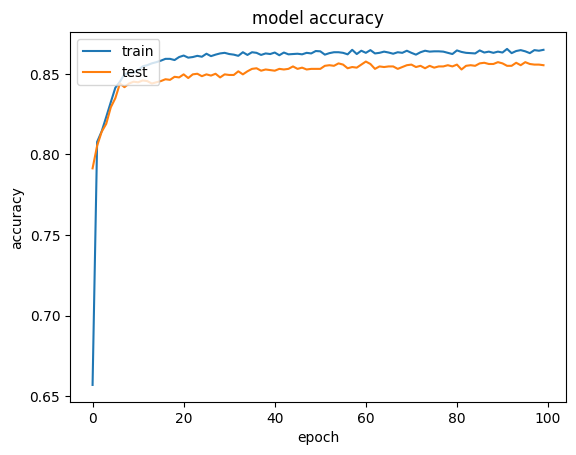

In [62]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



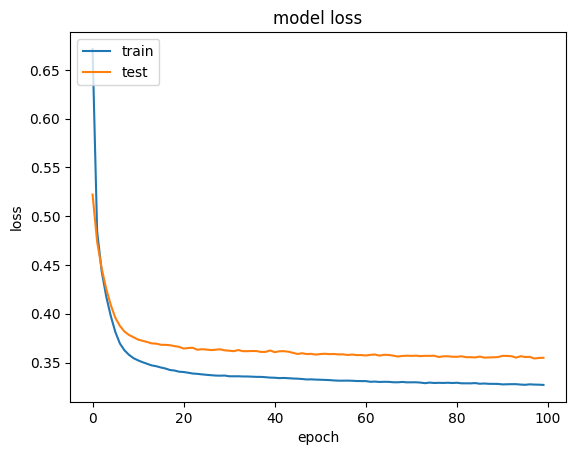

In [60]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()